#### LHS
|Name|Value|Explanation|
|:---|:---|:---|
|Dep. Variable|Rent|which variable is the response in the model|
|Model|OLS|What model you are using in the fit|
|Method|Least Squares|How the parameters of the model were calculated|
|Data|Sat,31 Oct 2015|Date|
|Time|13:44:15|Time|
|No.Observations|262|The number of observations(examples)|
|DF Residuals|227|Degrees of freedeom of the residuals. Numbers of observations-number of parameters|
|Df Model:|34|Parameters in Model = raws of coef(does not conclude constant parameters)|

#### RHS
|Name|Value|Explanation|
|:---|:---|:---|
|R-squared|0.377|The coeff of determination. A statistical measure of how well the regression line approximates the real data points|
|Adj.R-squared|0.283|The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals|
|F-statistic|4.034|A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals.|
|Prob(F-statistical)|||
|Log-likelihood|||
|AIC||Akaike Information Criterion AIC=2k+nln(SSR/n|
|BIC|||

- P-Value: 当参数等于0时(P>|t|), 小于5%为显著，小于1%为极显著，大于5%为不显著，不显著时可以抛弃此参数
- [0.025, 0.975]: 置信区间，95%的情况下，数值都在对应的interval内

# Ordinary Least Squares

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(9876789)

## OLS estimation

In [3]:
# Artificial data

nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [4]:
# our model needs an intercept so we add a column of 1s
# y = a0 + a1*x1 + a2*x2
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [5]:
print("x: ",x)
print("\nX: ", X)
print("\nx**2: ", x**2)
print("\nbeta: ", beta)
print("\ne: ", e)
print("\ny: ",y)

x:  [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.1818181

In [6]:
# Fit and summary
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.83e-239
Time:                        19:51:37   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [7]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


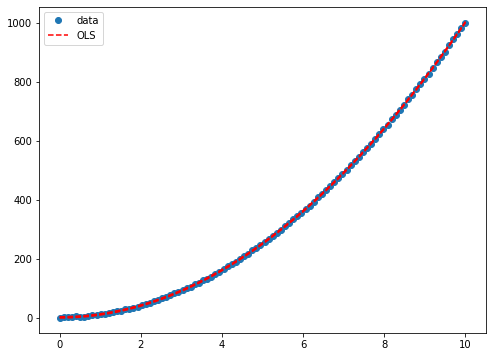

In [10]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label='data')
# ax.plot(x, y_true, 'b-', label='True')
ax.plot(x, results.fittedvalues, 'r--', label='OLS')
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

## OLS non-linear curve but linear in parameters

In [11]:
# with simulate artificial data with a non-linear relationship between a and y
nsample = 50
sig = 0.5
x = np.linspace(0, 20 , nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig*np.random.normal(size=nsample)

In [12]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           6.30e-27
Time:                        19:54:17   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [13]:
# Extract other quantities of interest
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

Parameters:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors:  [0.02640602 0.10380518 0.00231847 0.17121765]
Predicted values:  [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


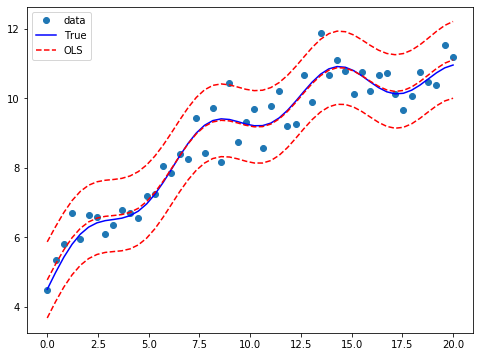

In [14]:
# Draw a plot to compare the true relationships to OLS predictions.
# Confidence intervals around the predictions are built using the 
# wls_prediction_std command
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label='data')
ax.plot(x, y_true, 'b-', label='True')
ax.plot(x, res.fittedvalues, 'r--', label='OLS')
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

## OLS with dummy variables

In [15]:
nsample = 50
groups = np.zeros(nsample, int)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [16]:
groups[20:40] = 1
groups[40:] = 2
# dummy = (groups[:, None] == np.unique(groups).astype(float))

dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, nsample)

# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [17]:
# Inspect the data:
print(X[:5, :])
print(y[:5])
print(groups)
print(dummy[:5, :])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[ 9.28223335 10.50481865 11.84389206 10.38508408 12.37941998]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [18]:
# Find and summary:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     671.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           5.69e-38
Time:                        20:18:24   Log-Likelihood:                -64.643
No. Observations:                  50   AIC:                             137.3
Df Residuals:                      46   BIC:                             144.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9999      0.060     16.689      0.0

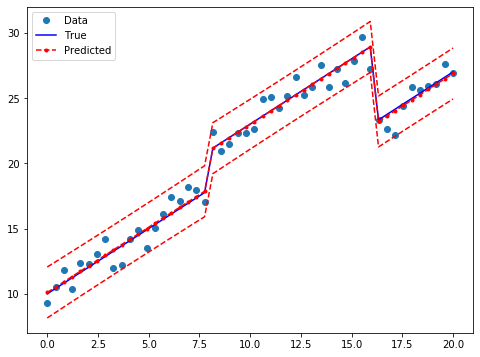

In [19]:

prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")



## Joint Hypothesis Test
#### F test

In [20]:
# We want to test the hypothesis that both coefficients on the dummy variables are equal to zero, 
# that is, 𝑅×𝛽=0. An F test leads us to strongly reject the null hypothesis of identical constant in the 3 groups
R =[[0,1,0,0], [0,0,1,0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[145.49268198]]), p=1.2834419617291377e-20, df_denom=46, df_num=2>


In [21]:
# You can also use formula-like syntax to test hypotheses
print(res2.f_test("x2=x3=0"))

<F test: F=array([[145.49268198]]), p=1.2834419617291078e-20, df_denom=46, df_num=2>


#### Small Group Effects

In [22]:
"""
If we generate artificial data with smaller group effects, 
the T test can no longer reject the Null hypothesis:
"""
heta = [1., 0.3, -0.0]
y_true = np.dot(X, beta)
y = y_true + np.random.normal(size=nsample)
res3 = sm.OLS(y, X).fit()

In [23]:
print(res3.f_test(R))

<F test: F=array([[120.08623168]]), p=5.507947151389074e-19, df_denom=46, df_num=2>


In [24]:
print(res3.f_test("x2=x3=0"))

<F test: F=array([[120.08623168]]), p=5.507947151389117e-19, df_denom=46, df_num=2>


In [25]:
print(res3.f_test("x2=0, x3=1"))

<F test: F=array([[150.83432373]]), p=6.260701294877522e-21, df_denom=46, df_num=2>


#### Mutlicollinearity

In [29]:
from statsmodels.datasets.longley import load_pandas
# endogenous
y = load_pandas().endog
# exogenous
X = load_pandas().exog
X = sm.add_constant(X)

X.head()

,const,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,1.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,1.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,1.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,1.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,1.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


In [28]:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           4.98e-10
Time:                        20:41:20   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


#### Condition Number

In [33]:
# One way to assess multicollinearity is to compute the condition number.
norm_x = X.values
for i, name in enumerate(X):
    if name == 'const':
        continue
    norm_x[:, i]  = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T, norm_x)

1 GNPDEFL
2 GNP
3 UNEMP
4 ARMED
5 POP
6 YEAR


In [35]:
X

,const,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,1.0,0.203000,0.146627,0.177462,0.147639,0.228725,0.249040
1,1.0,0.216452,0.162359,0.175127,0.135197,0.230902,0.249168
2,1.0,0.215718,0.161500,0.277341,0.150054,0.233327,0.249296
3,1.0,0.218898,0.178113,0.252409,0.153211,0.235784,0.249424
4,1.0,0.235284,0.205885,0.158104,0.287758,0.238220,0.249552
5,1.0,0.239931,0.217165,0.145525,0.333721,0.240760,0.249680
6,1.0,0.242133,0.228672,0.140855,0.329357,0.244637,0.249807
7,1.0,0.244578,0.227249,0.269507,0.311064,0.247028,0.249935
8,1.0,0.247513,0.248751,0.218739,0.283022,0.249513,0.250063
9,1.0,0.255829,0.262339,0.212563,0.265287,0.252374,0.250191


In [37]:
# we take the square root of the ratio of the biggest to the smallest eigen values.
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.87039619086


#### Dropping an observation

In [39]:
ols_results2 = sm.OLS(y.iloc[:14], X.iloc[:14]).fit()
print("Percentage change %4.2f%%\n"*7 % tuple([i for i in (ols_results2.params - ols_results.params)/ols_results.params*100]))


Percentage change 4.55%
Percentage change -2228.01%
Percentage change 154304695.31%
Percentage change 1366329.02%
Percentage change 1112549.36%
Percentage change 92708715.91%
Percentage change 817944.26%



In [40]:
# we can also look at formal statistics for this such as DFBETAS 
# -standardized measure of how much each coefficient changes when that observation is left out
infl = ols_results.get_influence()

In [41]:
# In general, we may consider DBETAS in absolute value greater than 2/sqrt(N) to be influential observations
2./len(X)**.5

0.5

In [42]:
print(infl.summary_frame().filter(regex="dfb"))

    dfb_const  dfb_GNPDEFL   dfb_GNP  dfb_UNEMP  dfb_ARMED   dfb_POP  dfb_YEAR
0   -0.016406    -0.234566 -0.045095  -0.121513  -0.149026  0.211057  0.013388
1   -0.020608    -0.289091  0.124453   0.156964   0.287700 -0.161890  0.025958
2   -0.008382     0.007161 -0.016799   0.009575   0.002227  0.014871  0.008103
3    0.018093     0.907968 -0.500022  -0.495996   0.089996  0.711142 -0.040056
4    1.871260    -0.219351  1.611418   1.561520   1.169337 -1.081513 -1.864186
5   -0.321373    -0.077045 -0.198129  -0.192961  -0.430626  0.079916  0.323275
6    0.315945    -0.241983  0.438146   0.471797  -0.019546 -0.448515 -0.307517
7    0.015816    -0.002742  0.018591   0.005064  -0.031320 -0.015823 -0.015583
8   -0.004019    -0.045687  0.023708   0.018125   0.013683 -0.034770  0.005116
9   -1.018242    -0.282131 -0.412621  -0.663904  -0.715020 -0.229501  1.035723
10   0.030947    -0.024781  0.029480   0.035361   0.034508 -0.014194 -0.030805
11   0.005987    -0.079727  0.030276  -0.008883  -0.

const     -3.640776e+06
GNPDEFL   -3.205182e+02
GNP       -5.527071e+04
UNEMP     -2.760501e+04
ARMED     -1.149619e+04
POP       -4.737801e+04
YEAR       1.496327e+07
dtype: float64

In [45]:
infl.summary_frame()

,dfb_const,dfb_GNPDEFL,dfb_GNP,dfb_UNEMP,dfb_ARMED,dfb_POP,dfb_YEAR,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.016406,-0.234566,-0.045095,-0.121513,-0.149026,0.211057,0.013388,0.140840,1.156014,0.424537,0.992915,1.181112,1.014472
1,-0.020608,-0.289091,0.124453,0.156964,0.287700,-0.161890,0.025958,0.040561,-0.467568,0.564978,-0.532850,-0.446281,-0.508591
2,-0.008382,0.007161,-0.016799,0.009575,0.002227,0.014871,0.008103,0.002930,0.190101,0.362075,0.143218,0.179590,0.135299
3,0.018093,0.907968,-0.500022,-0.495996,0.089996,0.711142,-0.040056,0.244193,-1.697900,0.372228,-1.307421,-1.941705,-1.495156
4,1.871260,-0.219351,1.611418,1.561520,1.169337,-1.081513,-1.864186,0.613917,1.638429,0.615511,2.073021,1.844027,2.333153
5,-0.321373,-0.077045,-0.198129,-0.192961,-0.430626,0.079916,0.323275,0.088845,-1.029989,0.369574,-0.788617,-1.033931,-0.791634
6,0.315945,-0.241983,0.438146,0.471797,-0.019546,-0.448515,-0.307517,0.078648,-0.754657,0.491532,-0.741982,-0.735136,-0.722789
7,0.015816,-0.002742,0.018591,0.005064,-0.031320,-0.015823,-0.015583,0.000549,-0.061430,0.504656,-0.062005,-0.057929,-0.058471
8,-0.004019,-0.045687,0.023708,0.018125,0.013683,-0.034770,0.005116,0.000488,0.063685,0.457117,0.058438,0.060056,0.055108
9,-1.018242,-0.282131,-0.412621,-0.663904,-0.715020,-0.229501,1.035723,0.235214,1.825818,0.330615,1.283160,2.169448,1.524659
